Estudo de Caso: Trabalho Final da Formação em Data Sciente
==========================================================

__Instrutora:__ [Thaís Ratis](https://github.com/thaisratis)

__Autores:__
* Flávio Silva
* Patrícia Lópes
* [Pablo Veinberg](https://github.com/pveinberg)


## Sobre o dataset

Este conjunto de dados para a previsão da ocorrência de diabetes contém uma gama diversificada de atributos relacionados à saúde, que foram coletados para auxiliar no desenvolvimento de modelos preditivos para identificar indivíduos em risco de diabetes. 

[Healthcare Diabetes Dataset](https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes)


In [26]:
# Imports

## Pandas e Numpy
import pandas as pd
import numpy as np

## Bibliotecas de plotagem
import matplotlib.pyplot as plt
import seaborn as sns

## Bibliotecas de ML
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [27]:
# Configuração do tema para plotagem com Seaborn
sns.set_style("darkgrid")

## Carga de dados

In [28]:
# Carga do dataset
data = pd.read_csv('./../../Datasets/Healthcare-Diabetes.csv')
data.shape

(2768, 10)

In [29]:
# Apresentação inicial dos valores
data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


## Pré-processamento

In [30]:
# Alteração dos nomes das colunas/variáveis
data.columns = ['id', 'quant_gravidez', 'glicose', \
                'pressao_saguinea', 'espesura_pele', \
                'insulina', 'imc', 'diabetes_genetica', 'idade', 'target']

In [31]:
# Exclusão da coluna 'id', que não será necessária para o análise
data.drop('id', axis=1, inplace=True)

In [32]:
# Exlusão de valores duplicados
data.drop_duplicates(keep='first', inplace=True)
data.duplicated().sum()

0

In [33]:
# Verificação de valores nulos
data.isnull().sum().sum()

0

In [34]:
# Validação da quantidade de valores e typos para cada coluna 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 0 to 2336
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   quant_gravidez     778 non-null    int64  
 1   glicose            778 non-null    int64  
 2   pressao_saguinea   778 non-null    int64  
 3   espesura_pele      778 non-null    int64  
 4   insulina           778 non-null    int64  
 5   imc                778 non-null    float64
 6   diabetes_genetica  778 non-null    float64
 7   idade              778 non-null    int64  
 8   target             778 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.8 KB


## Análise dos dados

In [35]:
# Correlação entre as variáveis
matrix_corr = data.corr()
matrix_corr.style.background_gradient(cmap='viridis')

,quant_gravidez,glicose,pressao_saguinea,espesura_pele,insulina,imc,diabetes_genetica,idade,target
quant_gravidez,1.000000,0.124729,0.143599,-0.085663,-0.076876,0.010874,-0.034159,0.532993,0.220380
glicose,0.124729,1.000000,0.140420,0.067604,0.333652,0.231745,0.137337,0.262591,0.459152
pressao_saguinea,0.143599,0.140420,1.000000,0.178080,0.082516,0.249552,0.042145,0.243475,0.073921
espesura_pele,-0.085663,0.067604,0.178080,1.000000,0.434904,0.367135,0.182582,-0.101986,0.078016
insulina,-0.076876,0.333652,0.082516,0.434904,1.000000,0.195511,0.190193,-0.038262,0.127030
imc,0.010874,0.231745,0.249552,0.367135,0.195511,1.000000,0.130382,0.043150,0.264761
diabetes_genetica,-0.034159,0.137337,0.042145,0.182582,0.190193,0.130382,1.000000,0.034839,0.172160
idade,0.532993,0.262591,0.243475,-0.101986,-0.038262,0.043150,0.034839,1.000000,0.244260
target,0.220380,0.459152,0.073921,0.078016,0.127030,0.264761,0.172160,0.244260,1.000000


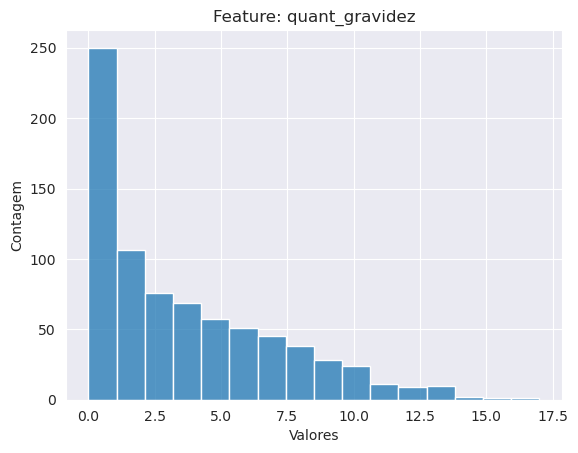

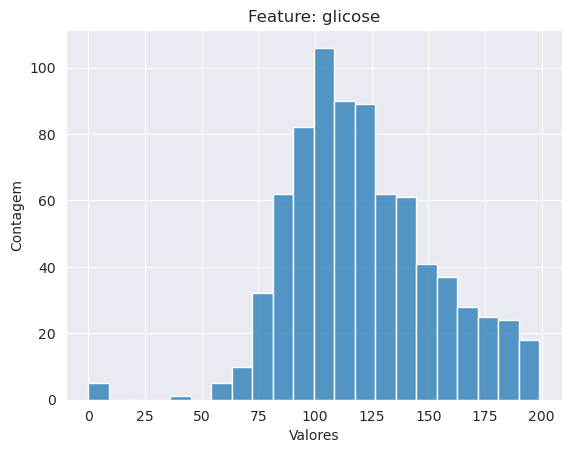

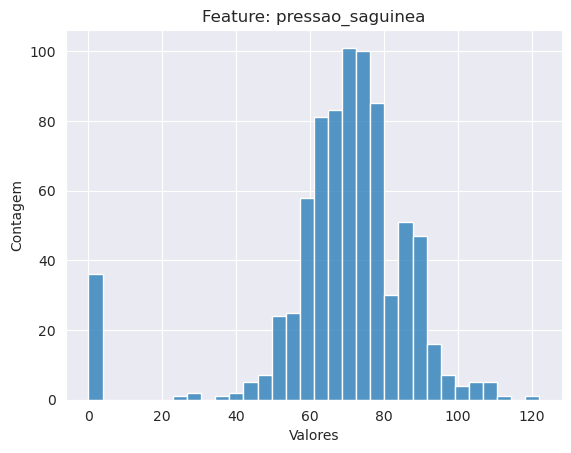

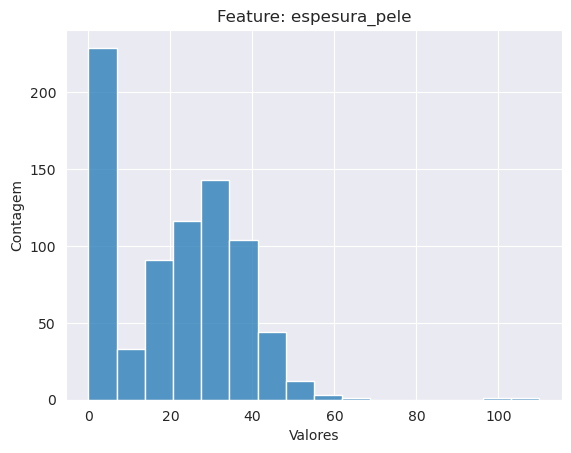

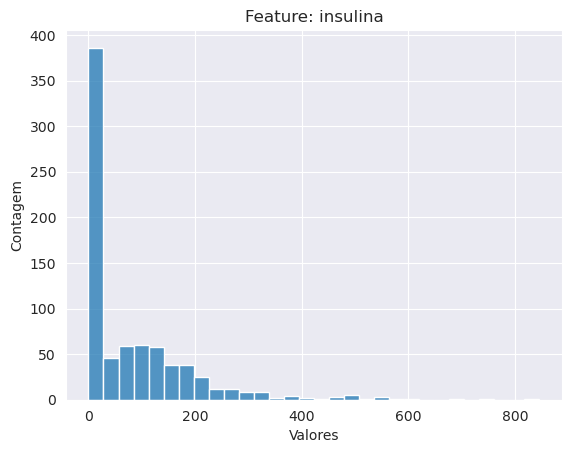

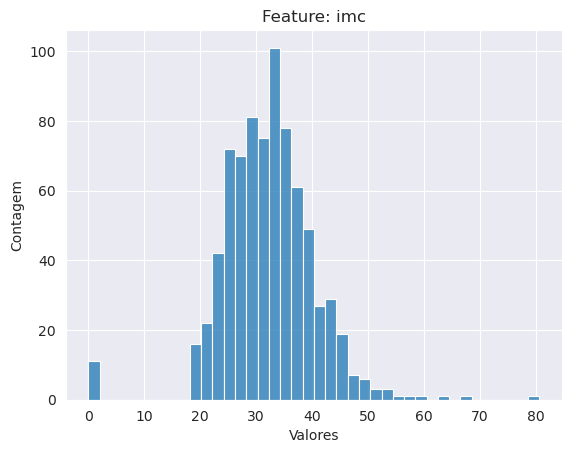

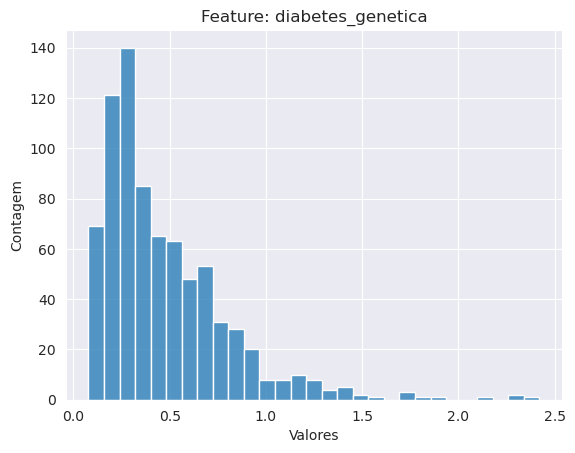

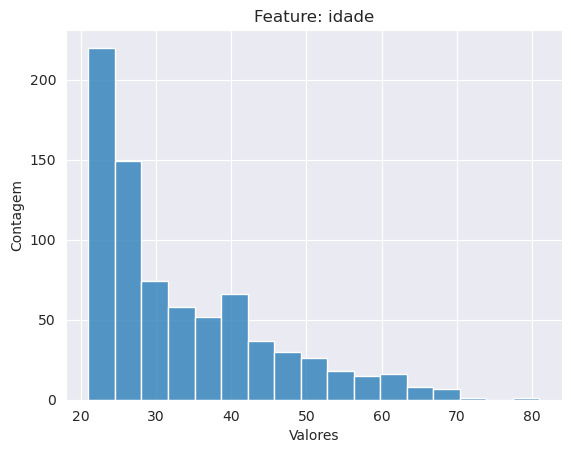

In [36]:
# Distribuição dos dados das variáveis independentes
features = list(data.columns)[:-1]
for col in features:
    sns.histplot(data[col])
    plt.title(f"Feature: {col}")
    plt.xlabel("Valores")
    plt.ylabel("Contagem")
    plt.show()

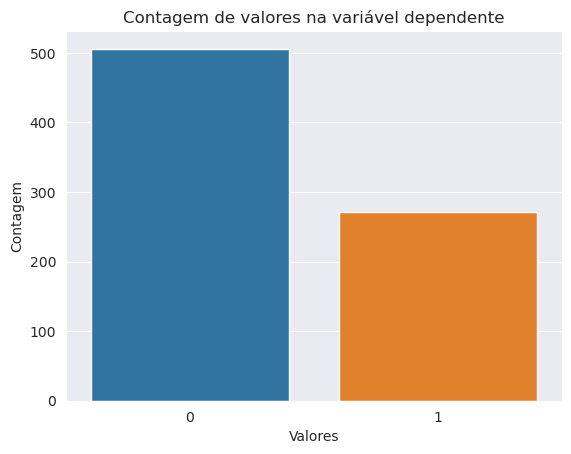

In [37]:
# Visualização do balanceamento da variável dependente
sns.countplot(data.target, x=data.target.index)
plt.title("Contagem de valores na variável dependente")
plt.xlabel('Valores')
plt.ylabel('Contagem')
plt.show()

In [38]:
# Seleção das variáveis dependente e independentes
y = data.target # Variável dependente
X = data.drop('target', axis=1) # variáveis indepentes

In [39]:
# Função para medir os resultados do modelo
def results(y_test,y_pred):
    results = confusion_matrix(y_test, y_pred)
    print ('Confusion Matrix :')
    print(results)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print ('Report : ')
    print (classification_report(y_test, y_pred))
    return accuracy

# Função para treinar o modelo e realizar previsões
def compute_knn(X, y, k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean', algorithm='auto')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = results(y_test, y_pred)

    return accuracy


In [40]:
# Treinamento do modelo, experimentando k=(3~30)

resultados = []
for k in range(3, 31, 2):
    print("=="*30)
    print("K:",k)
    print("=="*30)
    acc = compute_knn(X, y, k)
    resultados.append({'k':k, 'accuracy':acc})

K: 3
Confusion Matrix :
[[85 25]
 [20 26]]
Accuracy: 71.15%
Report : 
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       110
           1       0.51      0.57      0.54        46

    accuracy                           0.71       156
   macro avg       0.66      0.67      0.66       156
weighted avg       0.72      0.71      0.72       156

K: 5
Confusion Matrix :
[[85 25]
 [23 23]]
Accuracy: 69.23%
Report : 
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       110
           1       0.48      0.50      0.49        46

    accuracy                           0.69       156
   macro avg       0.63      0.64      0.63       156
weighted avg       0.70      0.69      0.69       156

K: 7
Confusion Matrix :
[[84 26]
 [22 24]]
Accuracy: 69.23%
Report : 
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       110
           1       0.48    

In [41]:
# Observando os resoltados do experimento num DataFrame
resultados_df = pd.DataFrame(resultados)
resultados_df

,k,accuracy
0,3,0.711538
1,5,0.692308
2,7,0.692308
3,9,0.724359
4,11,0.743590
5,13,0.743590
6,15,0.801282
7,17,0.788462
8,19,0.775641
9,21,0.782051


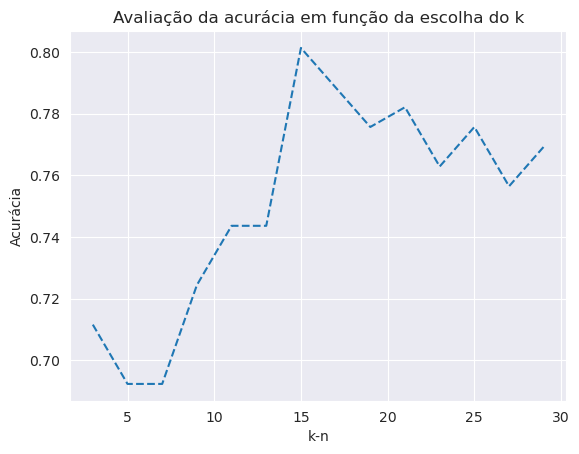

In [42]:
# Pltando os dados para verificação da melhor calibração do k
sns.lineplot(data=resultados_df, x='k', y='accuracy', linestyle='dashed')
plt.grid(visible=True)
plt.title("Avaliação da acurácia em função da escolha do k")
plt.xlabel('k-n')
plt.ylabel('Acurácia')
plt.show()

In [43]:
# Treinando novamente o modelo utilizando o k=15 (melhor opção)
compute_knn(X, y, 15)

Confusion Matrix :
[[99 11]
 [20 26]]
Accuracy: 80.13%
Report : 
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.70      0.57      0.63        46

    accuracy                           0.80       156
   macro avg       0.77      0.73      0.75       156
weighted avg       0.79      0.80      0.79       156



0.8012820512820513